<a href="https://colab.research.google.com/github/b-paramesh/Logistic_Regression_Decision_Tree_Random_Forest/blob/main/Day_19_teckworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount("/content/drive")
path="/content/drive/MyDrive/Colab Notebooks/CarPrice_Assignment.csv"
df=pd.read_csv(path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
missing_values_count = df.isnull().sum()
print("Count of missing values per column:")
print(missing_values_count)

Count of missing values per column:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
print(df['cylindernumber'].unique())
cylinder_mapping = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}
df['cylindernumber'] = df['cylindernumber'].map(cylinder_mapping)
# Convert the column to integer type
df['cylindernumber'] = df['cylindernumber'].astype(int)
print(df['cylindernumber'].unique())
df.info()

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
[ 4  6  5  3 12  2  8]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber 

In [ ]:
initial_duplicate_rows = df.duplicated().sum()
print(f"Initial number of duplicate rows: {initial_duplicate_rows}")

Initial number of duplicate rows: 0


In [ ]:
df.drop_duplicates(inplace=True)
final_duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows after removal: {final_duplicate_rows}")

Number of duplicate rows after removal: 0


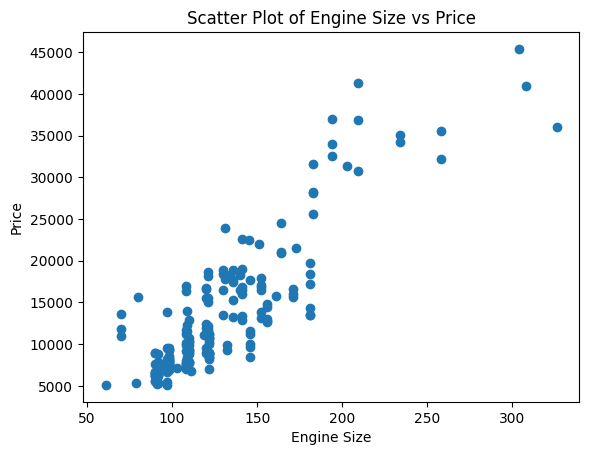

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
x=df[['enginesize']].values
y=df['price'].values

plt.scatter(x,y)
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Scatter Plot of Engine Size vs Price')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
x,y,test_size=0.2,random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(x_train, y_train)


LinearRegression()

In [ ]:
y_pred_lin = lin_model.predict(x_test)
engine_200 = np.array([[200]])
price_lin_200 = lin_model.predict(engine_200)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=3, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)
y_pred_poly = poly_model.predict(x_test_poly)
mse_linear = mean_squared_error(y_test, y_pred_lin)
mse_poly = mean_squared_error(y_test, y_pred_poly)

In [ ]:

y_pred_poly = poly_model.predict(x_test_poly)

price_poly_200 = poly_model.predict(poly.transform(engine_200))

In [ ]:
from sklearn.metrics import r2_score

print("Linear Regression R2:", round(r2_score(y_test, y_pred_lin), 3))
print("Polynomial Regression R2:", round(r2_score(y_test, y_pred_poly), 3))
print("Mean Squared Error (Linear Regression):", round(mse_linear, 2))
print("Mean Squared Error (Polynomial Regression):", round(mse_poly, 2))
print("Predicted price (Engine size = 200)")
print("Linear model:", round(price_lin_200[0], 2))
print("Polynomial model:", round(price_poly_200[0], 2))

Linear Regression R2: 0.804
Polynomial Regression R2: 0.853
Mean Squared Error (Linear Regression): 15465458.97
Mean Squared Error (Polynomial Regression): 11621389.46
Predicted price (Engine size = 200)
Linear model: 25427.15
Polynomial model: 27760.61


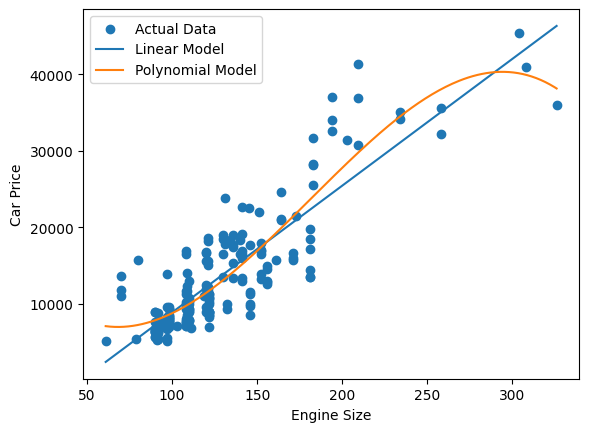

In [ ]:

x_range = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)

plt.scatter(x, y, label="Actual Data")
plt.plot(x_range, lin_model.predict(x_range), label="Linear Model")

x_range_poly = poly.transform(x_range)
plt.plot(x_range, poly_model.predict(x_range_poly), label="Polynomial Model")

plt.xlabel("Engine Size")
plt.ylabel("Car Price")
plt.legend()
plt.show()

Engine size = 200 (Polynomial Model)

Using polynomial regression, the predicted price for a car with engine size = 200 is obtained by fitting a curved relationship instead of a straight line. This prediction is generally more realistic because car prices do not increase linearly with engine size.

Prediction Errors (Business Interpretation)

Lower error (Polynomial model):

More accurate pricing

Better profit forecasting

Reduced risk of underpricing premium cars

Higher error (Linear model):

Can overprice small cars

Can underprice large-engine cars

Leads to revenue loss or poor competitiveness

Which model captures the trend better?

Polynomial regression

Reason:

Car price does not increase at a constant rate with engine size

Larger engines often increase price faster after a point

Polynomial regression captures this curvature
